In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
train = pd.read_csv('training.csv')

In [3]:
train.shape

(95662, 16)

In [4]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
desc = pd.read_csv('Xente_Variable_Definitions.csv')

In [6]:
desc

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [9]:
sample = pd.read_csv('sample_submission.csv')

In [10]:
sample.head(5)

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN


### Exploring the data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [12]:
train.isnull().any()

TransactionId           False
BatchId                 False
AccountId               False
SubscriptionId          False
CustomerId              False
CurrencyCode            False
CountryCode             False
ProviderId              False
ProductId               False
ProductCategory         False
ChannelId               False
Amount                  False
Value                   False
TransactionStartTime    False
PricingStrategy         False
FraudResult             False
dtype: bool

In [13]:
train.drop_duplicates(keep="first", inplace=True) #removing duplicate data if any
test.drop_duplicates(keep="first", inplace=True)

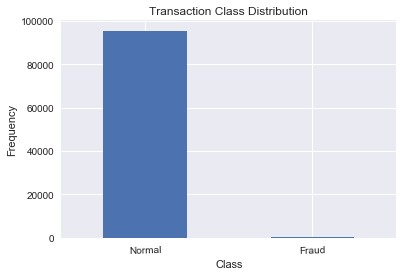

In [14]:
classes = train.FraudResult.value_counts()

classes.plot(kind = 'bar', rot=2)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), ["Normal", "Fraud"])

plt.xlabel("Class")

plt.ylabel("Frequency")
plt.show()

In [15]:
## Get the Fraud and the normal dataset 

fraud = train[train['FraudResult']==1]

normal = train[train['FraudResult']==0]

print("Total number of normal transactions = {}".format(normal.shape[0]))
print("Total number of fraudulent transactions = {}".format(fraud.shape[0]))

Total number of normal transactions = 95469
Total number of fraudulent transactions = 193


In [16]:
fraud.Amount.describe()

count    1.930000e+02
mean     1.535272e+06
std      2.100525e+06
min     -9.000000e+05
25%      5.000000e+05
50%      6.000000e+05
75%      2.000000e+06
max      9.880000e+06
Name: Amount, dtype: float64

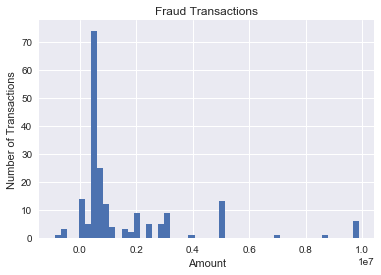

In [17]:
f_amount = fraud.Amount
plt.hist( f_amount, bins=50)
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title('Fraud Transactions')
plt.show()

In [18]:
normal.Amount.describe()

count    9.546900e+04
mean     3.627723e+03
std      4.035711e+04
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.500000e+03
max      2.400000e+06
Name: Amount, dtype: float64

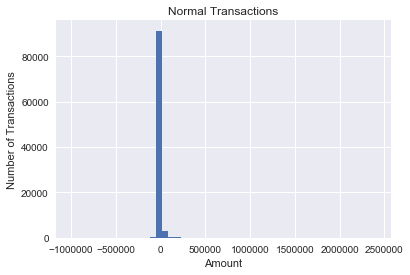

In [21]:
n_amount = normal.Amount
plt.hist( n_amount, bins=50)
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title('Normal Transactions')
plt.show()

####  FEATURE ENGINEERING 

In [22]:
#Extracting time and day from the TransactionStartTime column to create new features

train['TransactionStartTime'] = train['TransactionStartTime'].str.replace('T', ' ')
train['TransactionStartTime'] = train['TransactionStartTime'].str.replace('Z', '')

test['TransactionStartTime'] = test['TransactionStartTime'].str.replace('T', ' ')
test['TransactionStartTime'] = test['TransactionStartTime'].str.replace('Z', '')

In [23]:
train['TransactionStartTime'] = pd.to_datetime(train['TransactionStartTime'], infer_datetime_format=True) 
test['TransactionStartTime'] = pd.to_datetime(test['TransactionStartTime'], infer_datetime_format=True) 

In [24]:
train['hour'] = pd.to_datetime(train.TransactionStartTime).dt.hour
train['minute'] = pd.to_datetime(train.TransactionStartTime).dt.minute
train['day'] = pd.to_datetime(train.TransactionStartTime).dt.dayofweek

test['hour'] = pd.to_datetime(test.TransactionStartTime).dt.hour
test['minute'] = pd.to_datetime(test.TransactionStartTime).dt.minute
test['day'] = pd.to_datetime(test.TransactionStartTime).dt.dayofweek

In [25]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,hour,minute,day
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49,2,0,2,18,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08,2,0,2,19,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21,2,0,2,44,3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55,2,0,3,32,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21,2,0,3,34,3


In [26]:
# dropping the transaction starttime column
train = train.drop(["TransactionStartTime"], axis=1)
test = test.drop(["TransactionStartTime"], axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
#encoding the categorical data
for col in train.columns:
    if train[col].dtype == 'object' and col not in ['TransactionId', 'FraudResult']:
#         print(col)
        lbl = LabelEncoder()
        lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
        train[col] = lbl.fit_transform(list(train[col].values.astype('str')))
        test[col] = lbl.fit_transform(list(test[col].values.astype('str')))

In [29]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,hour,minute,day
0,TransactionId_76871,46980,2490,3535,2584,0,256,5,1,0,2,1000.0,1000,2,0,2,18,3
1,TransactionId_73770,31755,3219,2366,2584,0,256,3,19,2,1,-20.0,20,2,0,2,19,3
2,TransactionId_26203,60272,2713,996,2806,0,256,5,0,0,2,500.0,500,2,0,2,44,3
3,TransactionId_380,1797,3351,974,3733,0,256,0,11,8,2,20000.0,21800,2,0,3,32,3
4,TransactionId_28195,48941,3219,2366,3733,0,256,3,19,2,1,-644.0,644,2,0,3,34,3


In [30]:
#checking how the various features correleate with the various classes 
correlations = train.corr()
correlations.FraudResult

BatchId           -0.000217
AccountId         -0.011408
SubscriptionId    -0.014477
CustomerId         0.010927
CurrencyCode            NaN
CountryCode             NaN
ProviderId        -0.051937
ProductId         -0.033508
ProductCategory    0.028691
ChannelId          0.027754
Amount             0.557370
Value              0.566739
PricingStrategy   -0.033821
FraudResult        1.000000
hour               0.008295
minute            -0.003508
day               -0.006913
Name: FraudResult, dtype: float64

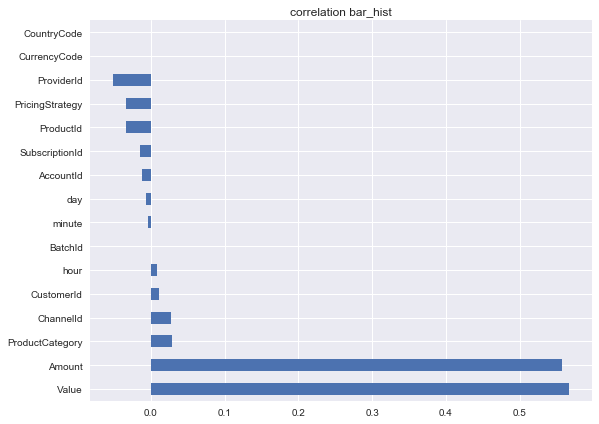

In [31]:
# Visualizing correlations of the various features to fraud_result
(correlations
     .FraudResult
     .drop("FraudResult") # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(9,7)))
plt.title("correlation bar_hist")
plt.show()

In [32]:
#Normalizing Amount and value columns
train["Value"] = train["Value"].abs()
train["Amount"] = train["Amount"].abs()
test["Value"] = test["Value"].abs()
test["Amount"] = test["Amount"].abs()

In [33]:
# dropping non-predictor feature columns and the target(train-set only)
target = train["FraudResult"]
train = train.drop(["TransactionId", "FraudResult"], axis=1)
test_id = test["TransactionId"]
test = test.drop(["TransactionId"], axis=1)

In [34]:
train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,hour,minute,day
0,46980,2490,3535,2584,0,256,5,1,0,2,1000.0,1000,2,2,18,3
1,31755,3219,2366,2584,0,256,3,19,2,1,20.0,20,2,2,19,3
2,60272,2713,996,2806,0,256,5,0,0,2,500.0,500,2,2,44,3
3,1797,3351,974,3733,0,256,0,11,8,2,20000.0,21800,2,3,32,3
4,48941,3219,2366,3733,0,256,3,19,2,1,644.0,644,2,3,34,3


In [35]:
test.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,hour,minute,day
0,21131,784,1941,1143,0,256,4,19,0,2,1000.0,1000,4,10,1,2
1,24825,1346,932,1756,0,256,4,5,2,2,2000.0,2000,2,10,2,2
2,35635,2179,1611,1143,0,256,3,22,2,1,50.0,50,2,10,2,2
3,3718,924,2055,1306,0,256,4,1,0,2,3000.0,3000,4,10,2,2
4,19131,2179,1611,1306,0,256,3,22,2,1,60.0,60,2,10,2,2


In [36]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudResult, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

In [38]:
X = train
y = target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [40]:
# RandomForest
MCC_scorer = make_scorer(matthews_corrcoef)
rf_pipe = Pipeline([
    ('model', RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [50, 75, 100, 150, 200, 250, 300]
                 }

grid_rf = GridSearchCV(estimator=rf_pipe, param_grid=param_grid_rf,
                       scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs',
                       cv=8, verbose=1, return_train_score=False)

grid_rf.fit(X_train, y_train)

Fitting 8 folds for each of 7 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  2.9min finished


GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__n_estimators': [50, 75, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(matthews_corrcoef), verbose=1)

In [ ]:
print("RandomForest: \n")
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print("\n")

In [4]:
#serialise the model

import dill
import gzip

In [ ]:
y_pred = grid_rf.predict(X_test)
print(f'f1_score: {f1_score(y_test, y_pred)}\n')
print(f'recall score: {recall_score(y_test, y_pred)}\n')
print(f'precision score: {precision_score(y_test, y_pred)}\n')

In [ ]:
rf_pred_test_prob = grid_rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred_test_prob)
rf_auc

In [ ]:
print("Predicting...")
predictions = grid_rf.predict(test)
submission = pd.DataFrame({'TransactionId': test_id, 'FraudResult': predictions})
(submission['FraudResult']==1).value_counts()

In [ ]:
with gzip.open("fraud_model.dill.gz", 'wb') as f:
    dill.dump(grid_rf, f, recurse=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

def preprocessdata(data):
    data.drop_duplicates(keep="first", inplace=True) #removing duplicate data if any
    #Extracting time and day from the TransactionStartTime column to create new features

    data['TransactionStartTime'] = data['TransactionStartTime'].str.replace('T', ' ')
    data['TransactionStartTime'] = data['TransactionStartTime'].str.replace('Z', '')
    data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], infer_datetime_format=True)
    data['hour'] = pd.to_datetime(data.TransactionStartTime).dt.hour
    data['minute'] = pd.to_datetime(data.TransactionStartTime).dt.minute
    data['day'] = pd.to_datetime(data.TransactionStartTime).dt.dayofweek
    # dropping the transaction starttime column
    data = data.drop(["TransactionStartTime"], axis=1)
    
    
    
    #encoding the categorical data
    for col in data.columns:
        if data[col].dtype == 'object' and col not in ['TransactionId', 'FraudResult']:
            print(col)
            lbl = LabelEncoder()
            data[col] = lbl.fit_transform(list(data[col].values.astype('str')))
    #Normalizing Amount and value columns
    data["Value"] = data["Value"].abs()
    data["Amount"] = data["Amount"].abs()
    
    # dropping non-predictor feature columns and the target(train-set only)
    if "FraudResult" in data.columns:
        target = data["FraudResult"]
        data = data.drop(["FraudResult"], axis=1)
        
    else:
        target = None
    if "TransactionId" in data.columns:
        data = data.drop(["TransactionId"], axis=1)
        
    return data, target

    

In [2]:
train = pd.read_csv('training.csv')

In [5]:
with gzip.open("fraud_model.dill.gz", 'rb') as f:
    model = dill.load(f)

In [9]:
dt, de = preprocessdata(train)
dt

BatchId
AccountId
SubscriptionId
CustomerId
CurrencyCode
ProviderId
ProductId
ProductCategory
ChannelId


,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,hour,minute,day
0,46980,2490,3535,2584,0,256,5,1,0,2,1000.0,1000,2,2,18,3
1,31755,3219,2366,2584,0,256,3,19,2,1,20.0,20,2,2,19,3
2,60272,2713,996,2806,0,256,5,0,0,2,500.0,500,2,2,44,3
3,1797,3351,974,3733,0,256,0,11,8,2,20000.0,21800,2,3,32,3
4,48941,3219,2366,3733,0,256,3,19,2,1,644.0,644,2,3,34,3
5,39491,73,2701,318,0,256,5,16,0,2,2000.0,2000,2,3,35,3
6,13782,1187,801,1326,0,256,4,16,0,2,10000.0,10000,4,3,44,3
7,48778,3219,2366,1326,0,256,3,19,2,1,500.0,500,2,3,45,3
8,90214,1433,3121,3354,0,256,5,1,0,2,500.0,500,2,4,14,3
9,81620,3399,3569,36,0,256,0,6,2,2,600.0,600,2,4,31,3


In [13]:
import random
[i for i in random.rand(100, 1000)]

TypeError: 'int' object is not iterable